In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import opensmile


In [5]:
df = pd.read_csv("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_train_labeled.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,audio,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,label
0,0,0,LA_T_9054834,22.778221,0.098499,21.302931,22.475891,24.721390,3.418459,100.164154,...,0.011031,0.175287,3.559871,1.644737,0.172000,0.178146,0.345000,0.414035,-17.783484,0
1,1,1,LA_T_6980436,28.998428,0.088787,27.743202,29.003092,30.589899,2.846697,136.143051,...,0.000337,0.405845,5.720339,4.077253,0.095789,0.066989,0.135000,0.103401,-17.886377,0
2,2,2,LA_T_2117042,32.400963,0.143300,30.407715,34.263645,35.941391,5.533676,138.879913,...,0.023323,0.097204,3.652968,2.803739,0.200000,0.145373,0.115714,0.102240,-18.018290,0
3,3,3,LA_T_2547007,35.747711,0.068483,34.369492,36.317474,37.616093,3.246601,215.282730,...,0.008957,0.093073,1.825558,1.229508,0.140000,0.091469,0.558571,0.743187,-20.248434,1
4,4,4,LA_T_1715181,34.141598,0.159520,32.097713,33.297329,34.005608,1.907894,200.921494,...,0.007199,0.230671,4.347826,3.555556,0.141250,0.139144,0.153333,0.173461,-19.660992,0


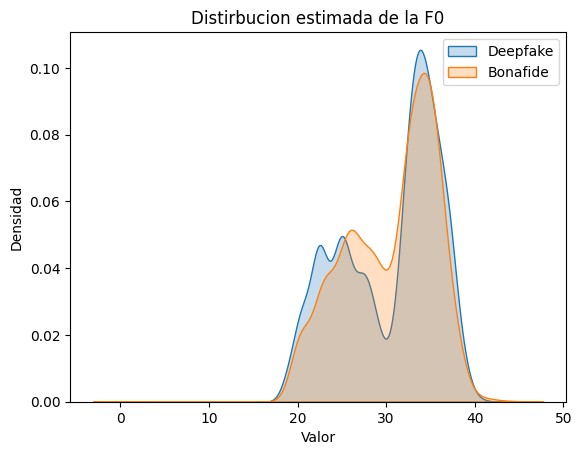

In [13]:
# cargamos el csv de los egemaps
df = pd.read_csv("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_train_labeled.csv")
df1 = df[df["label"] == 0]
df2 = df[df["label"] == 1]
#sns.kdeplot(df["F0semitoneFrom27.5Hz_sma3nz_amean"], fill=True)
sns.kdeplot(df1["F0semitoneFrom27.5Hz_sma3nz_amean"], fill=True, label="Deepfake")
sns.kdeplot(df2["F0semitoneFrom27.5Hz_sma3nz_amean"], fill=True, label="Bonafide")

plt.title("Distirbucion estimada de la F0")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()
# random forest y elejimos los primeros

# distribucion continua

# representamos el multiiplot

In [14]:
# cargamos el DataFrame
df = pd.read_csv("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_train_labeled.csv")

# sacamos las distribuciones de spoofed y de bonafide
df1 = df[df["label"] == 0]
df2 = df[df["label"] == 1]

In [17]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

features = smile.process_file("/home/juanjo/Documentos/eGeMAPS_embedding/in_the_wild/release_in_the_wild/0.wav")

print(features.columns.tolist())

['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean', 'mfcc4_sma3_std

In [28]:
# random forest
cols_gmaps = ['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean', 'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean', 'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean', 'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean', 'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean', 'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean', 'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean', 'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean', 'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean', 'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean', 'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean', 'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean', 'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean', 'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean', 'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean', 'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean', 'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'loudnessPeaksPerSec', 'VoicedSegmentsPerSec', 'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec', 'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength', 'equivalentSoundLevel_dBp']
model = RandomForestClassifier(n_estimators=500)
x = df[cols_gmaps]
y = df["label"]
model.fit(x, y)

# ordenamos las columnas de mayor a menor importancia
importances = model.feature_importances_
feature_names = np.array(x.columns)
indices = np.argsort(importances)[::-1][:20]

indices_names = feature_names[indices][::-1]

In [21]:
feature_names[indices][::-1]

array(['F2amplitudeLogRelF0_sma3nz_amean', 'mfcc4_sma3_stddevNorm',
       'F1bandwidth_sma3nz_amean', 'loudnessPeaksPerSec',
       'alphaRatioUV_sma3nz_amean', 'spectralFlux_sma3_amean',
       'slopeV500-1500_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_amean', 'loudness_sma3_stddevNorm',
       'spectralFlux_sma3_stddevNorm', 'MeanUnvoicedSegmentLength',
       'mfcc4_sma3_amean', 'loudness_sma3_percentile20.0',
       'F3bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_amean',
       'StddevUnvoicedSegmentLength', 'slopeUV500-1500_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'slopeUV0-500_sma3nz_amean'],
      dtype=object)

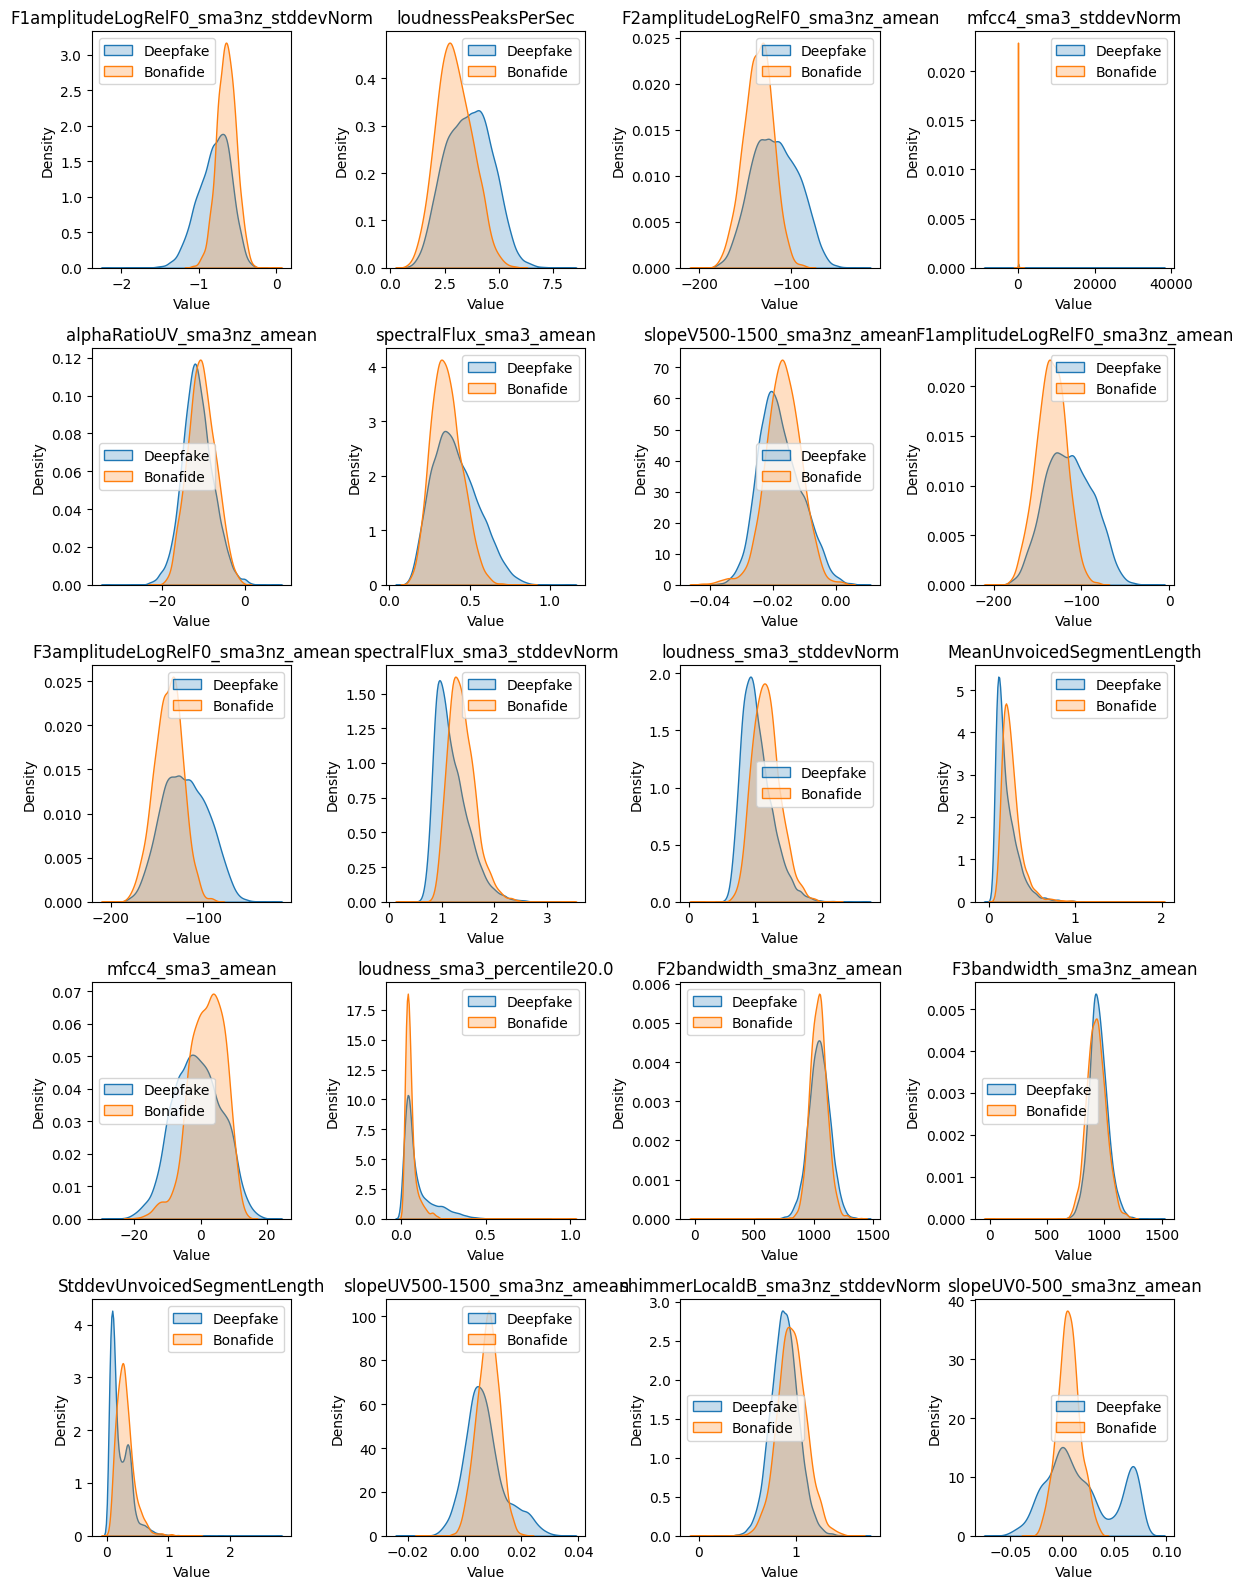

In [29]:
fig, axs = plt.subplots(5, 4, figsize=(12, 16))
axs = axs.flatten()

for i, feature in enumerate(indices_names):
    sns.kdeplot(df1[feature], fill=True, ax=axs[i], label="Deepfake")
    sns.kdeplot(df2[feature], fill=True, ax=axs[i], label="Bonafide")
    axs[i].set_title(feature)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel("Density")
    axs[i].legend()

#plt.legend()
plt.tight_layout()
plt.show()

In [35]:
def plot_important_egemaps(folder):
    # load the data
    df = pd.read_csv(folder)
    df1 = df[df["label"] == 0] # deepfake
    df2 = df[df["label"] == 1] # bonafide

    # random forest
    cols_gmaps = ['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean', 'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean', 'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean', 'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean', 'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean', 'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean', 'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean', 'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean', 'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean', 'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean', 'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean', 'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean', 'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean', 'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean', 'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean', 'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean', 'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'loudnessPeaksPerSec', 'VoicedSegmentsPerSec', 'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec', 'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength', 'equivalentSoundLevel_dBp']
    model = RandomForestClassifier(n_estimators=500)
    x = df[cols_gmaps]
    y = df["label"]
    model.fit(x, y)

    # ordenamos las columnas de mayor a menor importancia
    importances = model.feature_importances_
    feature_names = np.array(x.columns)
    indices = np.argsort(importances)[::-1][:20]

    indices_names = feature_names[indices][::-1]

    # representamos
    fig, axs = plt.subplots(5, 4, figsize=(12, 16))
    axs = axs.flatten()

    for i, feature in enumerate(indices_names):
        sns.kdeplot(df1[feature], fill=True, ax=axs[i], label="Deepfake")
        sns.kdeplot(df2[feature], fill=True, ax=axs[i], label="Bonafide")
        axs[i].set_title(feature)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel("Density")
        axs[i].legend()

    #plt.legend()
    plt.tight_layout()
    plt.show()

def plot_nature_bar(folder):
    # load the data
    df = pd.read_csv(folder)
    df1 = df[df["label"] == 0] # deepfake
    df2 = df[df["label"] == 1] # bonafide

    labels = ["deepfake", "bonafide"]
    number = [len(df1), len(df2)]

    # plot
    plt.bar(labels, number)
    plt.title("Proportion of bonafide and deepfake data")
    plt.xlabel("Label")
    plt.ylabel("Number of files")
    plt.show()
    

## ASVspoof LA Train

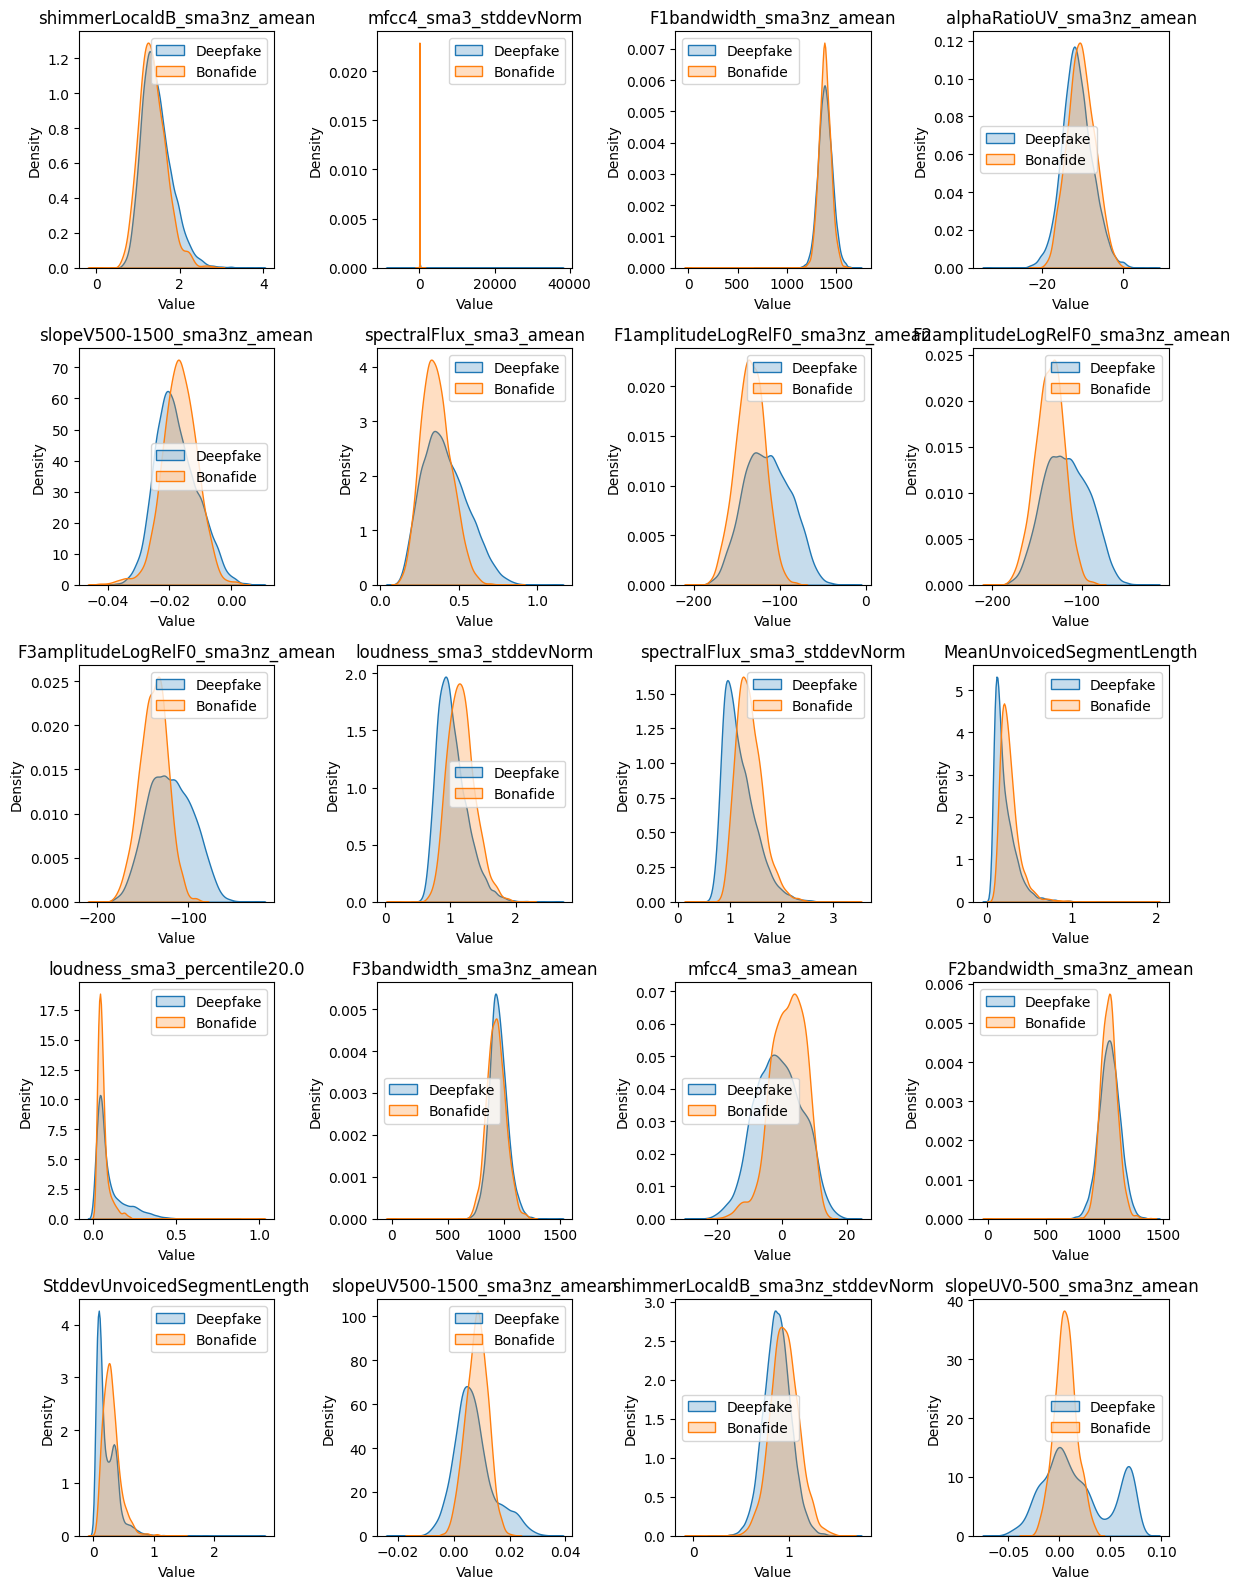

In [31]:
plot_important_egemaps("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_train_labeled.csv")

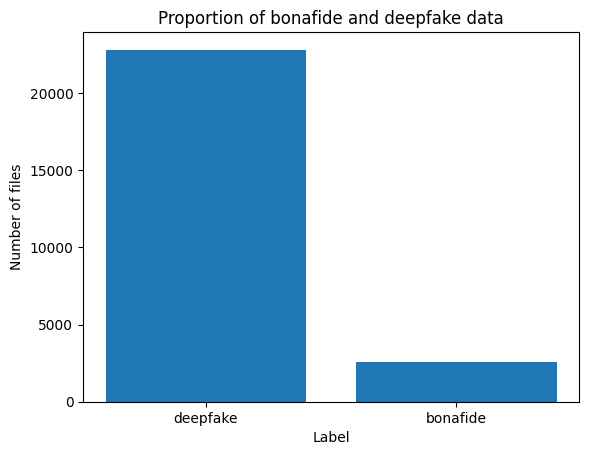

In [36]:
plot_nature_bar("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_train_labeled.csv")

## ASVspoof LA Eval

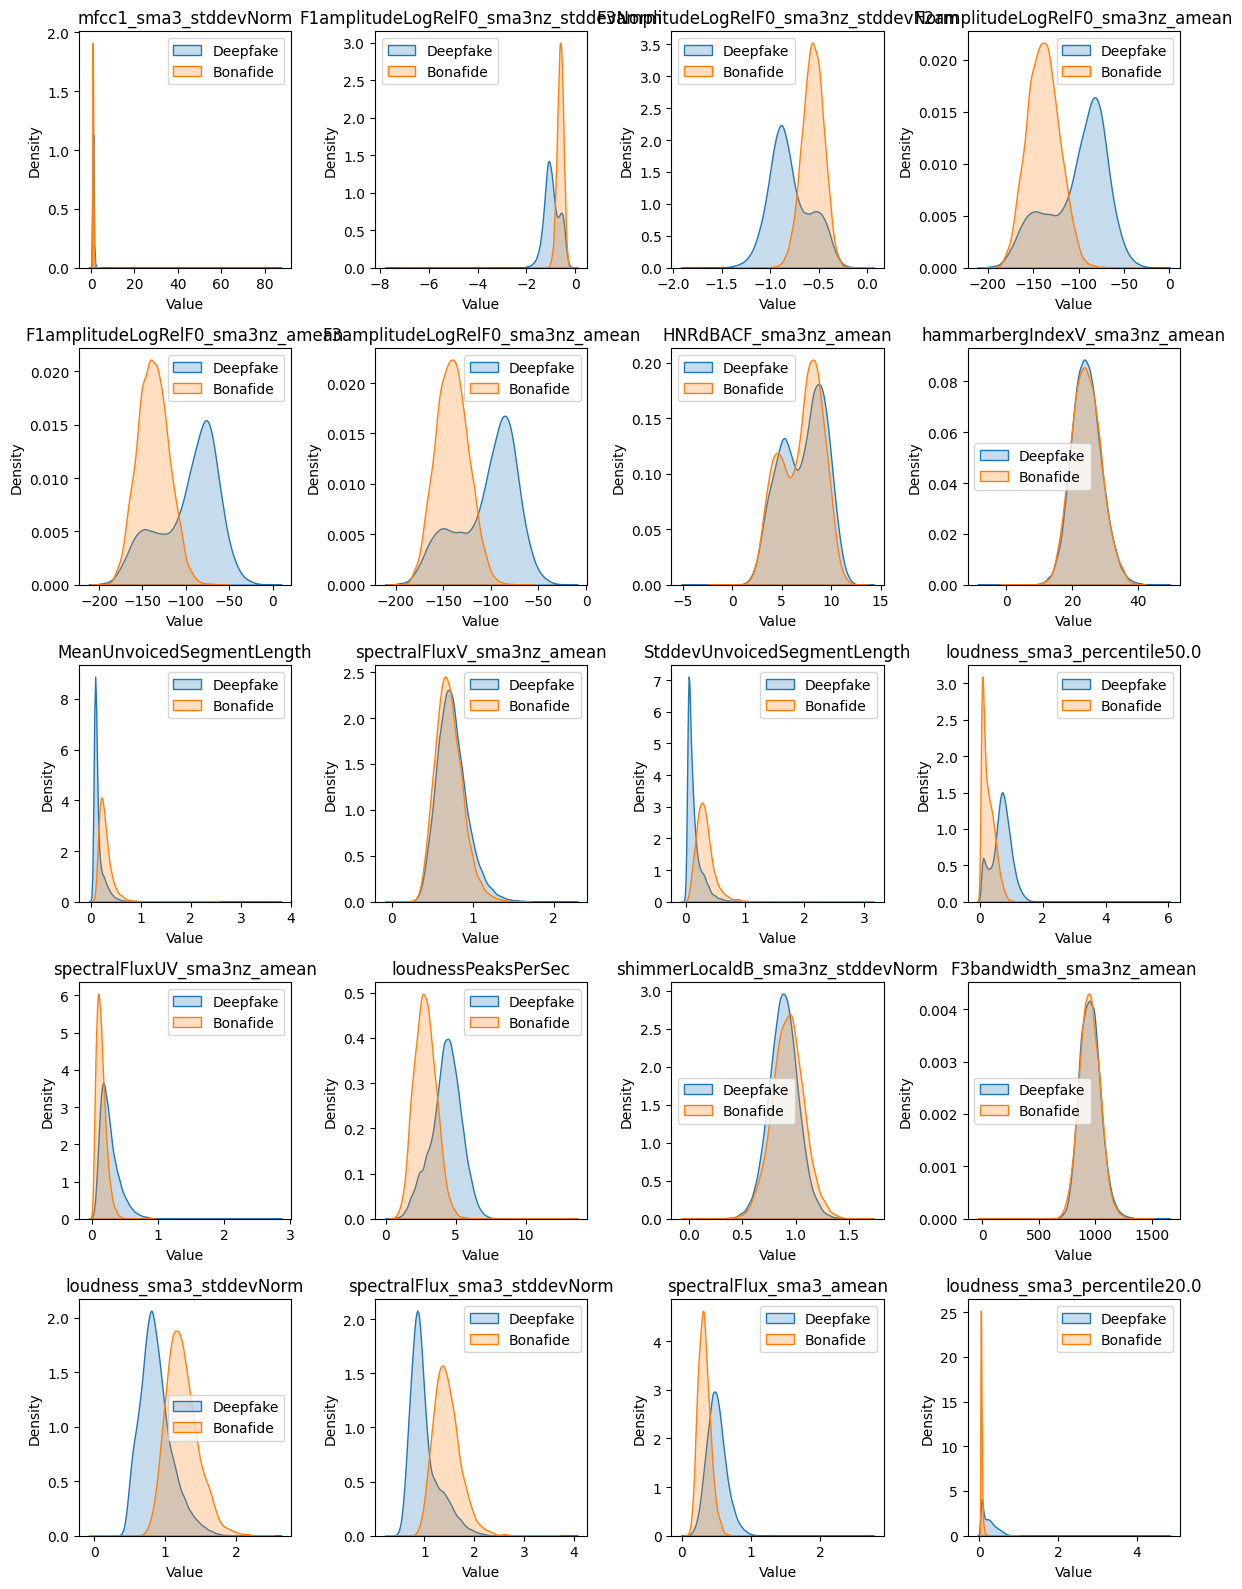

In [32]:
plot_important_egemaps("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_eval_labeled.csv")

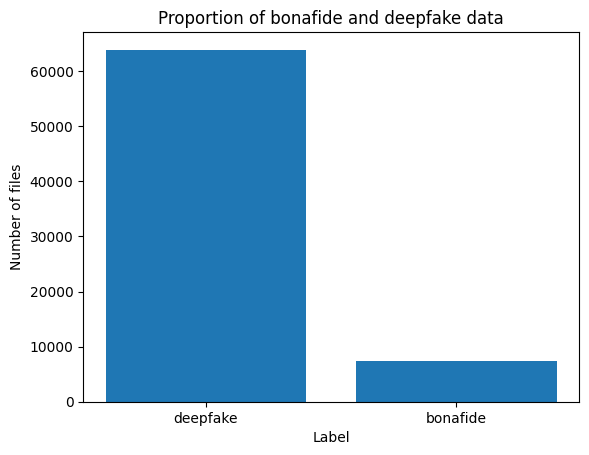

In [37]:
plot_nature_bar("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_LA_eval_labeled.csv")

## HABLA

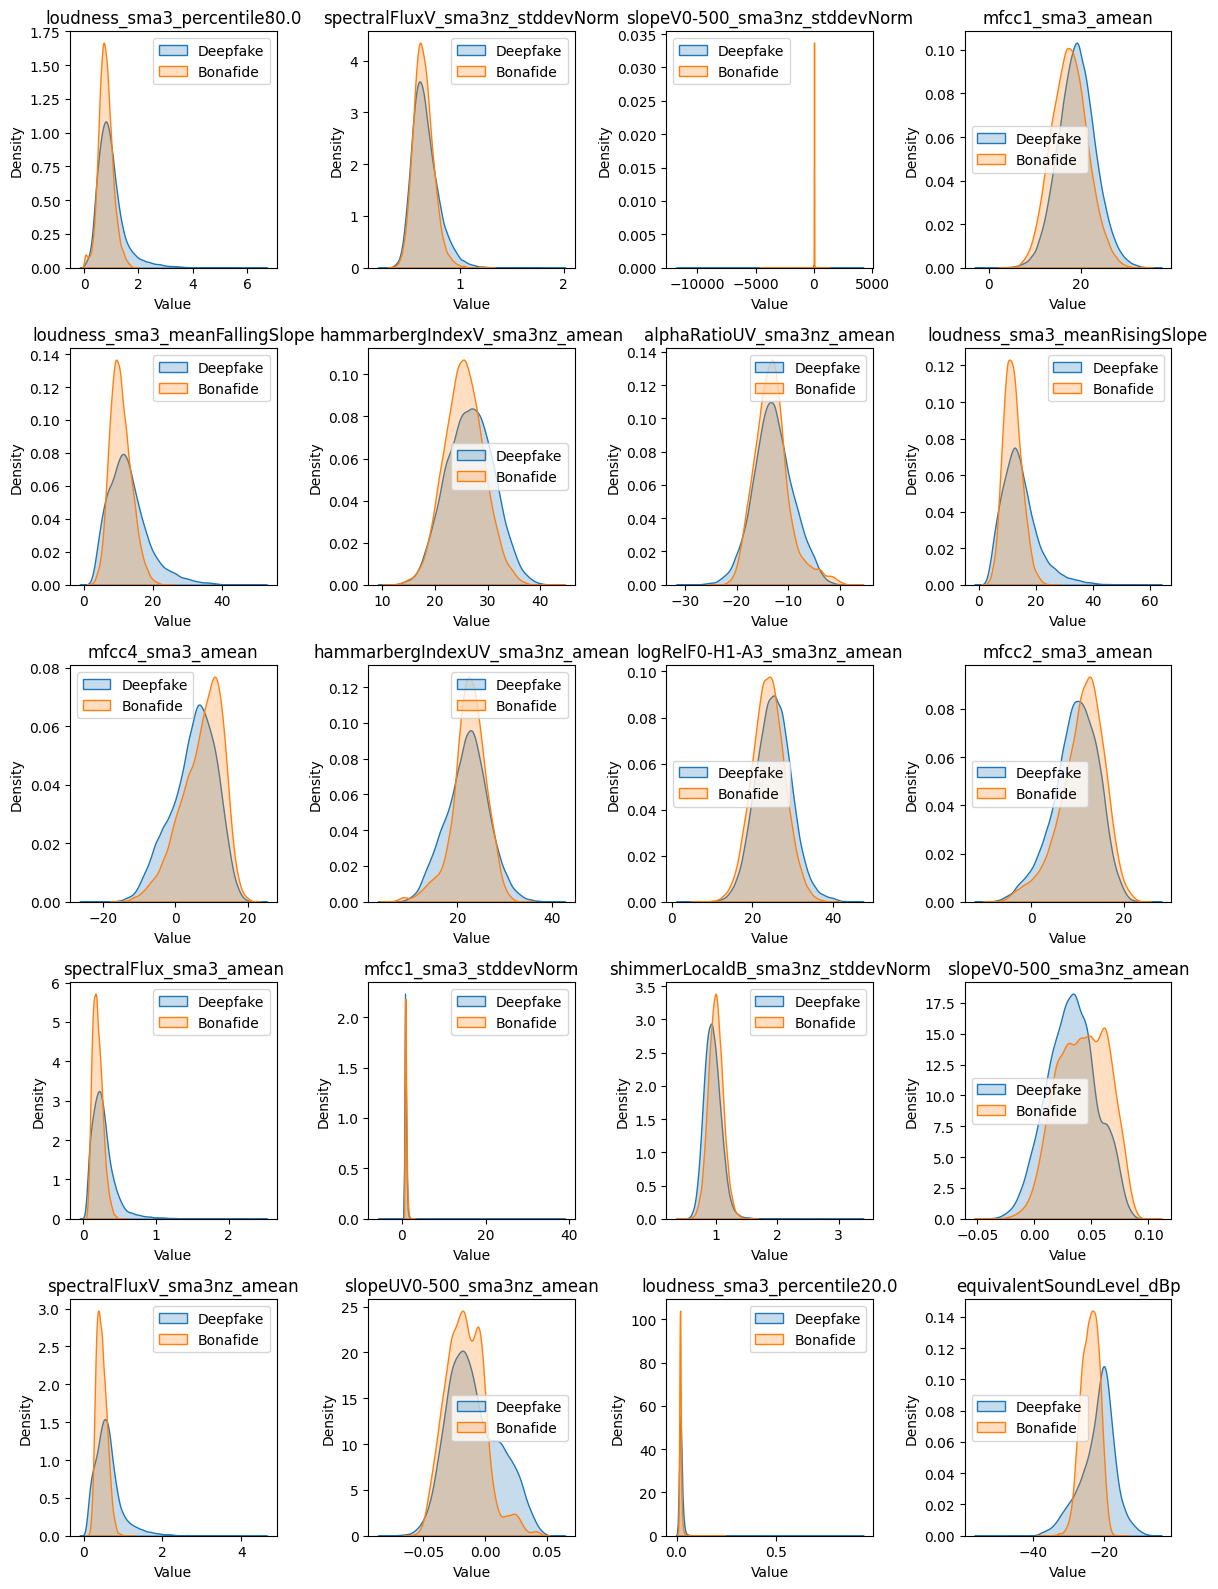

In [33]:
plot_important_egemaps("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_HABLA_labeled.csv")

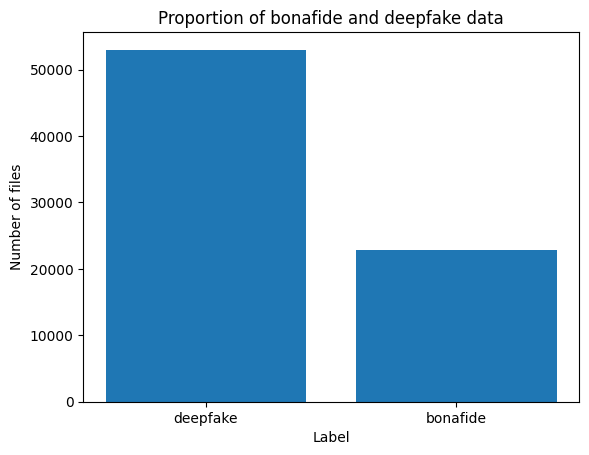

In [38]:
plot_nature_bar("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_HABLA_labeled.csv")

## In-the-wild

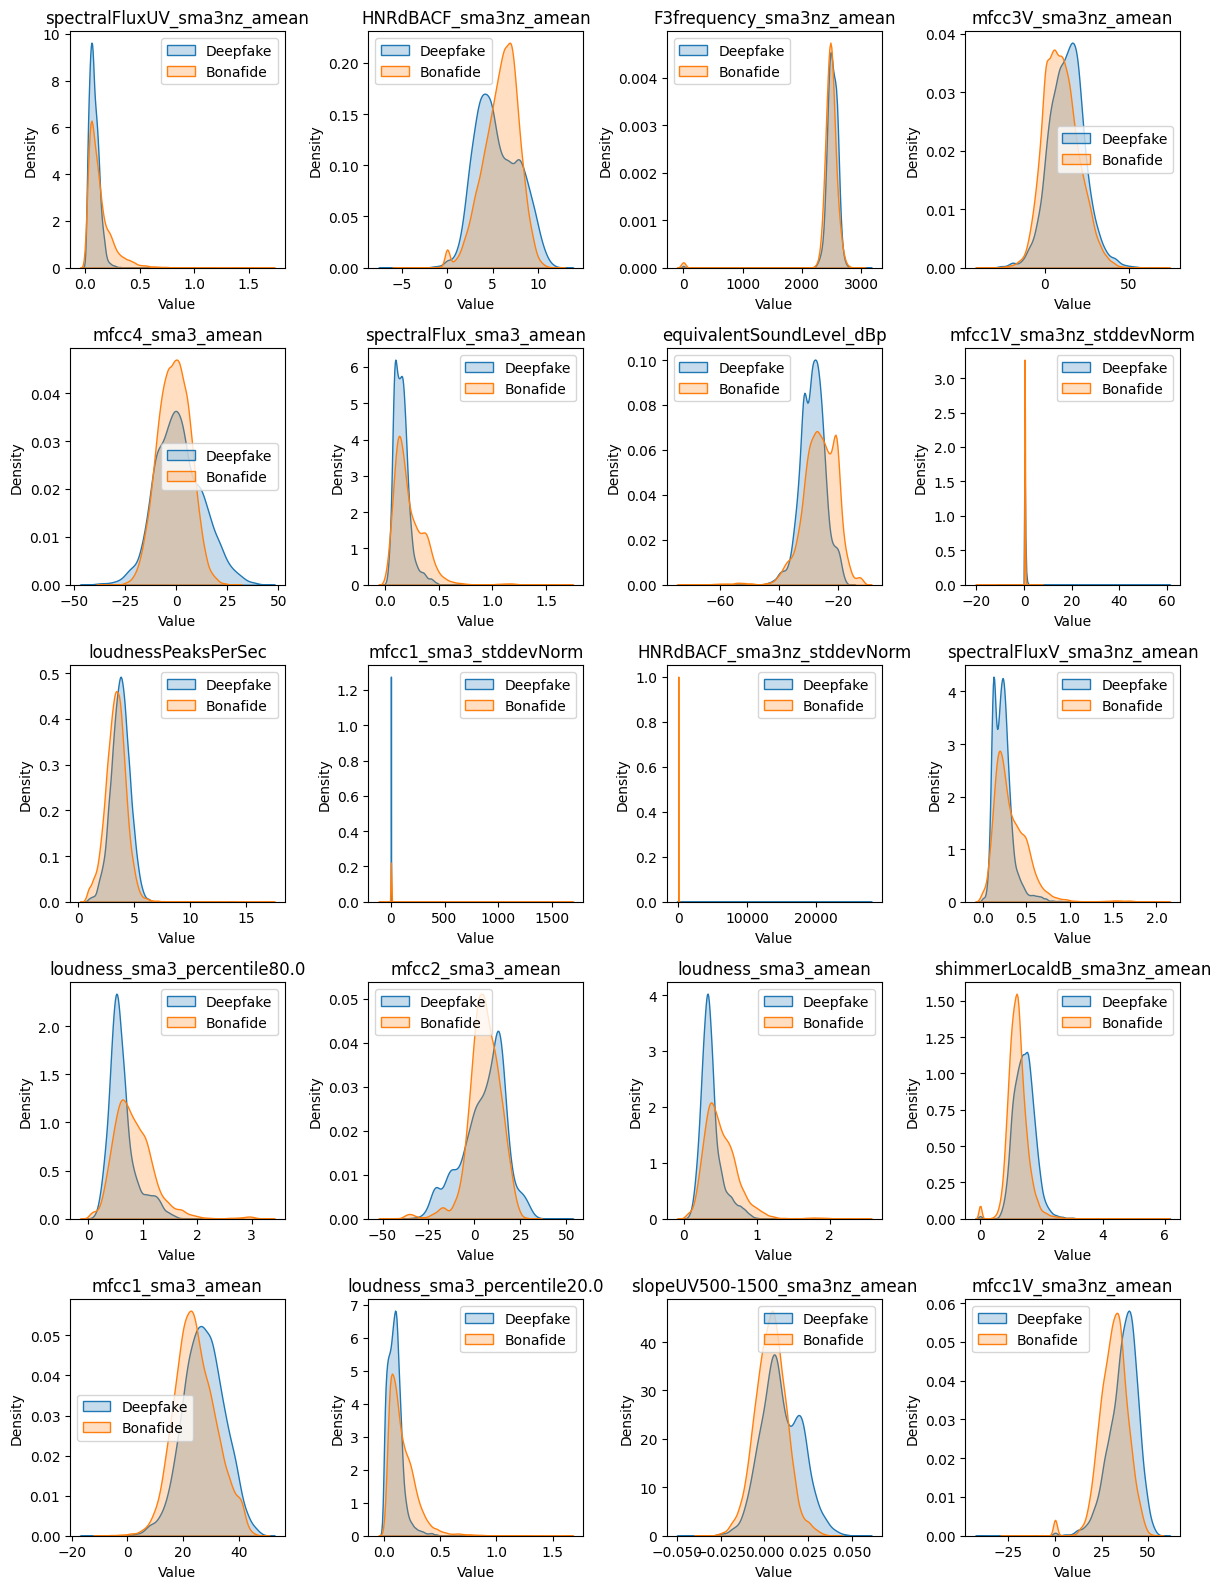

In [34]:
plot_important_egemaps("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_wild_labeled.csv")

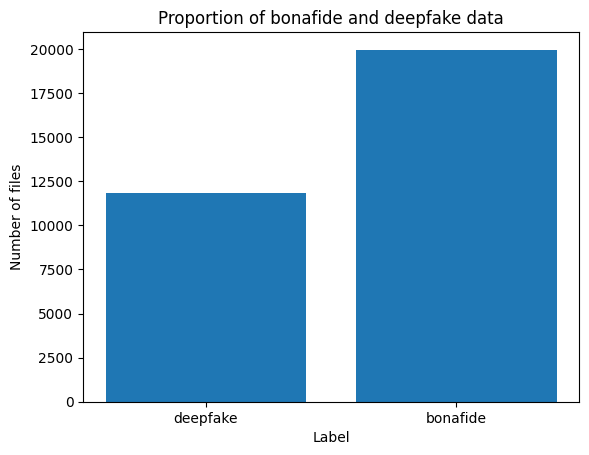

In [39]:
plot_nature_bar("/home/juanjo/Documentos/eGeMAPS_embedding/egemaps_wild_labeled.csv")